#TASK #1: UNDESTAND THE PROBLEM STATEMENT AND BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1djxup79_KiGtKFiH7AgSD0Bj-2D90TBg)

#TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [3]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [4]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load the stock news data
stock_df = pd.read_csv("/content/drive/MyDrive/Python and ML for Financial Analysis/stock_sentiment.csv")

In [6]:
# Let's view the dataset 
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [7]:
# dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [8]:
# check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

**MINI CHALLENGE #1:**

- **How many unique elements are present in the 'sentiment' column? Try to find out with two different methods**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



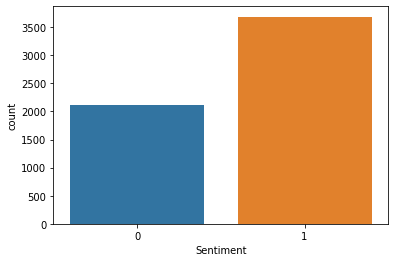

In [22]:
sns.countplot(stock_df['Sentiment'])

In [24]:
print(len(stock_df.Text.unique()))
print(len(stock_df.Sentiment.unique()))

print(len(set(stock_df.Text)))
print(len(set(stock_df.Sentiment)))

print(stock_df['Text'].nunique())

5791
2
5791
2
5791


#TASK #3: PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)



In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
test = "@I love AI & Machine Learning.!!!"
test_punc_removed = [char for char in test if char not in string.punctuation]
#print(test_punc_removed)
test_punc_removed = ''.join(test_punc_removed)
print(test_punc_removed)

I love AI  Machine Learning


In [30]:
# Let's define a function to remove punctuations
def remove_punctuation(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed = ''.join(punc_removed)
    return punc_removed

In [31]:
# Let's remove punctuations from our dataset 
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punctuation)

In [32]:
stock_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [33]:
# See an example
stock_df['Text'][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [34]:
stock_df['Text Without Punctuation'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

**MINI CHALLENGE #2:** 
- **Remove punctuations using a different method**

In [37]:
import re
test1 = "Somethin#$%^&*&^%$%^&*( ciuhscn oerfhc isdcnf .? cw ggg!!!"
test1_punc_removed = re.sub(r'[^\w\s]', '', test1)
print(test1_punc_removed)

Somethin ciuhscn oerfhc isdcnf  cw ggg


# TASK #4: PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [40]:
# download stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [43]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'will', 'aap', 'co', 'day', 'user', 'stock', 'today', 'week', 'year'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
# Remove stopwords and remove short words (less than 3 characters) and get all text in a list
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token) >= 3:
            result.append(token)
    return result

In [45]:
# apply pre-processing to the text column
stock_df['Text Without Punctuation & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punctuation & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


In [46]:
stock_df['Text Without Punctuation'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2 see prev posts'

In [47]:
stock_df['Text Without Punctuation & Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [50]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punctuation & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


**MINI CHALLENGE #3:**

- **Modify the code in order keep words that are longer than or equal 2 characters instead of 3**
- **Add 'https' to the list of stopwords and rerun the code**



In [48]:
# kaafi simple and not necessary :)

# TASK #5: PLOT WORDCLOUD

In [49]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punctuation & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


In [51]:
# join the words into a string
stock_df['Joined Processed Text'] = stock_df['Text Without Punctuation & Stopwords'].apply(lambda x: ' '.join(x))

In [52]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punctuation & Stopwords,Joined Processed Text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


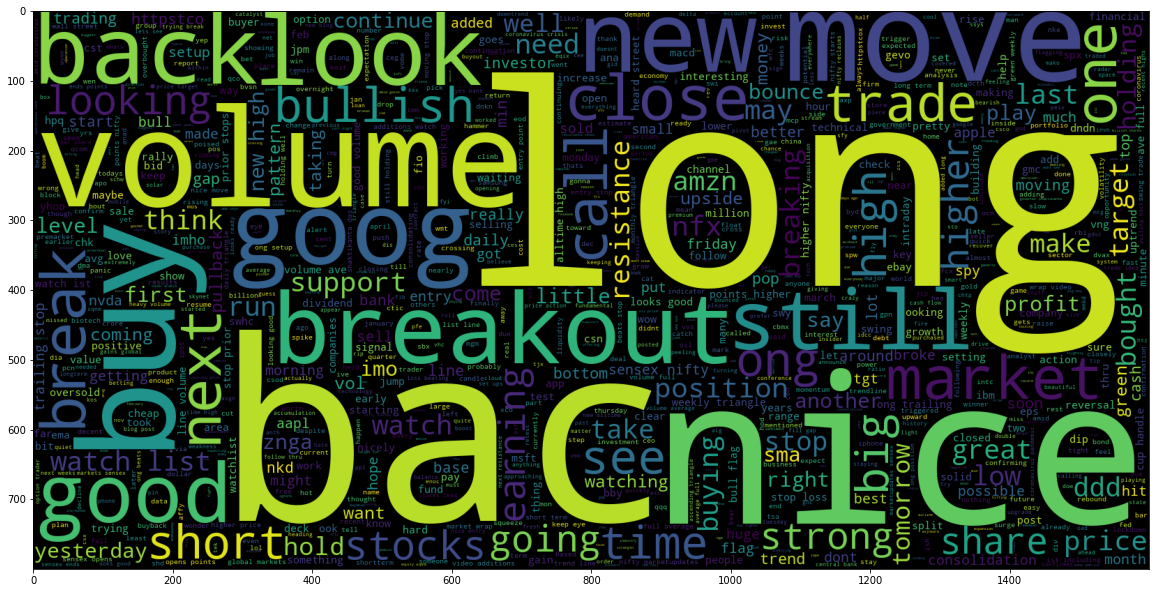

In [56]:
# Word Cloud for positive sentiment
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800).generate(' '.join(stock_df[stock_df['Sentiment']==1]['Joined Processed Text']))
plt.imshow(wc)

**MINI CHALLENGE #4:**
- **Visualize the wordcloud for tweets that have negative sentiment**

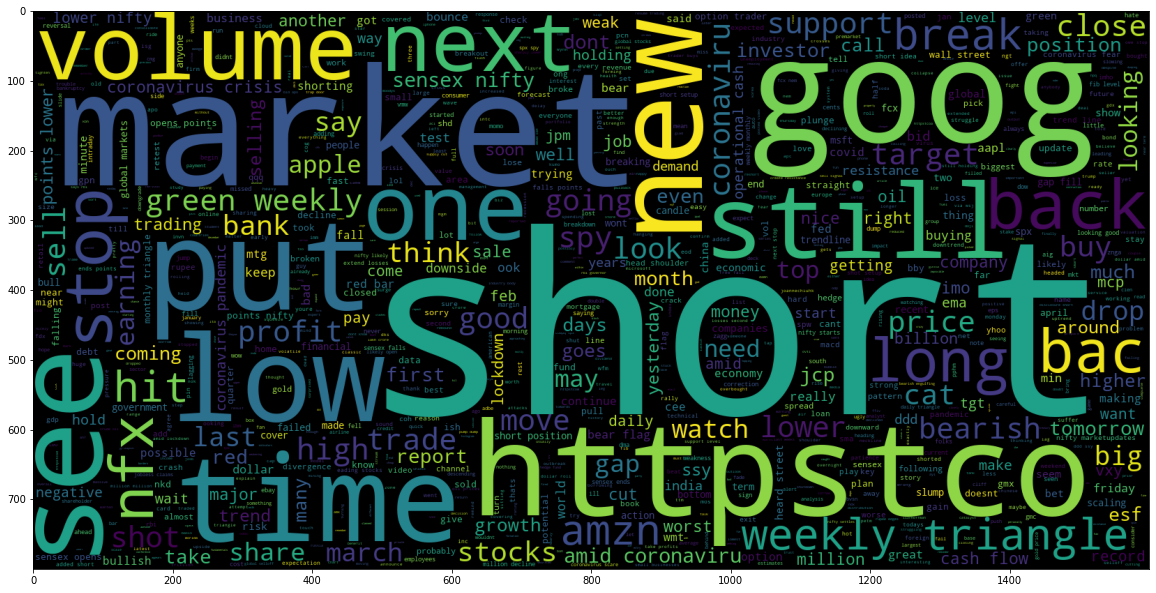

In [57]:
# Word Cloud for negative sentiment
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800).generate(' '.join(stock_df[stock_df['Sentiment']==0]['Joined Processed Text']))
plt.imshow(wc)

# TASK #6: VISUALIZE CLEANED DATASETS

In [58]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punctuation & Stopwords,Joined Processed Text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [59]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [62]:
# word_tokenize is used to break up a string into words
first_entry = stock_df['Joined Processed Text'][0]
print(first_entry)
tokenized_first_entry = nltk.word_tokenize(stock_df['Joined Processed Text'][0])
print(tokenized_first_entry)

kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [63]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
max_length = -1
for doc in stock_df['Joined Processed Text']:
    tokens = nltk.word_tokenize(doc)
    if max_length < len(tokens):
        max_length = len(tokens)

print("The maximum number of words in any document is", max_length)

The maximum number of words in any document is 20


In [65]:
# Get all the lengths in a list to plot histogram:
tweets_length = [len(nltk.word_tokenize(doc)) for doc in stock_df['Joined Processed Text']]
print(tweets_length)

[14, 6, 7, 1, 0, 1, 8, 13, 8, 4, 10, 18, 8, 8, 11, 5, 12, 10, 12, 4, 6, 5, 2, 5, 3, 10, 3, 3, 9, 6, 8, 10, 8, 3, 10, 11, 4, 8, 11, 10, 10, 7, 9, 8, 4, 10, 8, 7, 7, 9, 10, 10, 8, 2, 14, 12, 9, 8, 1, 14, 7, 11, 5, 13, 6, 6, 7, 6, 6, 10, 9, 4, 10, 13, 16, 6, 9, 6, 2, 11, 5, 4, 9, 11, 16, 4, 9, 5, 6, 2, 1, 5, 9, 4, 7, 6, 7, 10, 1, 3, 9, 4, 16, 8, 10, 11, 18, 6, 7, 13, 12, 9, 3, 3, 10, 10, 8, 6, 8, 5, 5, 8, 9, 15, 3, 5, 9, 18, 13, 11, 3, 1, 1, 2, 7, 12, 12, 8, 8, 10, 9, 10, 15, 8, 9, 9, 12, 10, 6, 10, 13, 4, 11, 8, 15, 13, 8, 12, 5, 5, 3, 7, 2, 4, 10, 5, 6, 10, 6, 16, 9, 6, 5, 10, 9, 10, 8, 2, 10, 9, 10, 12, 7, 10, 7, 3, 6, 5, 9, 9, 4, 6, 5, 4, 4, 8, 10, 8, 8, 13, 9, 7, 10, 12, 8, 6, 5, 3, 10, 11, 6, 9, 10, 13, 10, 7, 12, 7, 11, 10, 4, 4, 3, 10, 2, 9, 10, 15, 12, 10, 13, 9, 8, 2, 1, 12, 12, 6, 9, 9, 12, 5, 2, 3, 8, 6, 14, 5, 6, 7, 9, 1, 1, 11, 7, 14, 4, 4, 9, 5, 4, 9, 9, 10, 13, 5, 11, 4, 4, 6, 1, 8, 4, 11, 4, 6, 11, 4, 10, 8, 8, 6, 10, 3, 10, 10, 2, 9, 10, 13, 9, 10, 3, 2, 8, 4, 6, 14, 5, 

In [126]:
# Plot the distribution for the number of words in a text
#bins = len(set(tweets_length))
fig = px.histogram(x=tweets_length, nbins=50)
fig.show()

**MINI CHALLENGE #5:**
- **Use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments class**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



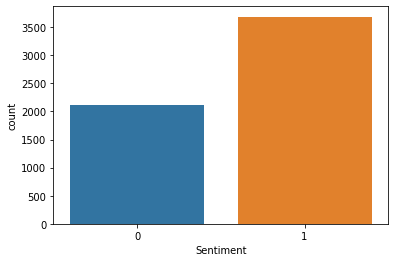

In [81]:
sns.countplot(stock_df['Sentiment'])

# TASK #7: PREPARE THE DATA BY TOKENIZING AND PADDING

![alt text](https://drive.google.com/uc?id=13j8m-JOpK994CtukR1EShiY_hGGjkNx-)

In [82]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punctuation & Stopwords,Joined Processed Text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [83]:
# Obtain the total words present in the dataset
list_of_words = []
for i in stock_df['Text Without Punctuation & Stopwords']:
    for j in i:
        list_of_words.append(j)

print(list_of_words)

['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts', 'movie', 'return', 'feageed', 'indicator', 'trades', 'awesome', 'afraid', 'short', 'amzn', 'looking', 'like', 'nearmonopoly', 'ebooks', 'mnta', 'pgnx', 'current', 'downtrend', 'break', 'otherwise', 'shortterm', 'correction', 'medterm', 'downtrend', 'mondays', 'relative', 'weakness', 'nyx', 'win', 'tie', 'tap', 'ice', 'int', 'bmc', 'aon', 'chk', 'biib', 'goog', 'ower', 'trend', 'line', 'channel', 'test', 'volume', 'support', 'watch', 'tomorrow', 'ong', 'entry', 'assuming', 'fcx', 'opens', 'tomorrow', 'trigger', 'buy', 'still', 'much', 'like', 'setup', 'really', 'worries', 'everyone', 'expects', 'market', 'rally', 'nowusually', 'exact', 'opposite', 'happens', 'every', 'time', 'shall', 'see', 'soon', 'bac', 'spx', 'jpm', 'gamcos', 'arry', 'haverty', 'apple', 'extremely', 'cheap', 'great', 'video', 'maykiljil', 'posted', 'agree', 'msft', 'going', 'higher', 'possibly', 'n

In [85]:
# Obtain the total number of unique words
total_words = len(set(list_of_words))
print(total_words)

9268


In [86]:
# split the data into test and train 
X = stock_df['Text Without Punctuation & Stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5211,)
(580,)
(5211,)
(580,)


In [90]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [91]:
print(train_sequences)

[[224, 3, 2492, 42, 73, 461, 1894, 1291, 94, 320], [1530, 264, 27, 3638, 273, 960, 108], [3, 3639, 1292, 287, 3640, 109, 7, 1118, 14, 149, 14, 462, 3641], [12, 4, 463, 1531], [1293], [1532, 1533, 56, 2493, 321, 649, 3642, 3643, 3644, 164, 372], [288, 322, 25, 76, 1], [3645, 70, 3646, 2494, 1119, 521, 463, 62, 1895, 3647, 3648, 3649], [237, 34], [10, 2495, 274, 215, 174, 166, 859, 435, 860, 274, 215, 861, 238, 86, 1120], [6, 209, 5, 411, 1534, 436, 31, 52], [1, 101, 323, 46, 1535, 961], [206, 3650, 1536, 80, 1537, 1538, 1121], [289, 82, 20, 3651, 3652, 14, 289, 7, 46, 3653], [324, 121, 325, 110], [862, 346, 302, 3654], [183, 3655, 134, 73, 14, 225, 35, 210], [347, 1], [7, 155, 3656, 3657, 238, 1294, 3658], [127, 32, 3, 5, 1, 491, 34, 49, 89, 54], [324, 83, 273, 77, 6, 1896, 3659, 3660, 1896, 197, 6, 142, 11, 324, 564, 1295], [322, 373, 4, 198, 1296, 863, 1539, 3661, 1122, 320], [23, 464, 43, 29, 65, 18, 700, 3662, 3663], [2496, 70, 216, 2496, 391, 135, 68, 2, 20, 130], [47, 11, 253, 86]

In [92]:
print(test_sequences)

[[1474, 68, 2995, 27, 58, 1299, 58, 64], [1477, 7, 32, 28, 3, 15], [38, 1805, 60, 227, 275, 329, 31, 227, 6926, 719, 4], [238, 859, 326, 9, 2, 955], [925, 1459, 32, 316, 5, 99, 663, 638], [4233, 1357, 512, 8424, 5666, 14, 683, 320, 17, 430, 1500], [3835, 411, 574, 35], [2717, 11, 130, 1266, 2034, 131, 160, 123], [6, 532, 827, 322, 180, 621, 724, 621, 1028, 6088, 8], [672, 1014, 4337, 2461, 528, 62, 3341, 49, 1499], [2714, 137], [4731, 21, 40], [752, 3, 943, 1730, 1708, 901, 882, 96, 235], [1790, 119, 4], [3, 21, 2, 1361, 2463, 107, 137, 169, 2463, 21, 682], [180, 595, 5379, 1732, 969, 18, 218, 51], [196, 918, 605, 153, 229, 66, 364, 2296, 1059], [1186, 1565], [6665, 2214, 52, 2051, 60, 81, 181], [3300, 169, 8, 860, 1224, 54], [23, 29, 2414, 3019, 1127, 2885, 78, 550, 188, 239, 51], [1322, 4703, 922, 7, 73, 603, 278, 1757, 149], [1477, 3329, 4, 64, 63, 176, 476, 821, 275, 359, 13, 338], [3, 4], [10, 1112, 1136, 200], [188, 18, 6439, 53, 222], [1645, 7667, 124, 143], [104, 53, 1071, 186,

In [102]:
print("The encoding for", X_train[0], '\nis:', train_sequences[0])

The encoding for ['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts'] 
is: [224, 3, 2492, 42, 73, 461, 1894, 1291, 94, 320]


In [103]:
# Add padding to training and testing to make all of the sequences have the smae size

padded_train_sequences = pad_sequences(train_sequences, maxlen=29)
padded_test_sequences = pad_sequences(test_sequences, maxlen=29)

In [104]:
# Check the paddings for first three elements
for i in range(3):
    print("The padded encoding for document", i+1, '\nis', padded_train_sequences[i])

The padded encoding for document 1 
is [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  224    3 2492   42   73  461 1894 1291   94
  320]
The padded encoding for document 2 
is [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 1530  264   27 3638  273  960
  108]
The padded encoding for document 3 
is [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    3 3639 1292  287 3640  109    7 1118   14  149   14  462
 3641]


In [105]:
y_train

1934    0
4643    1
3455    1
836     1
1102    1
       ..
5750    0
2342    1
2726    0
3330    1
2984    0
Name: Sentiment, Length: 5211, dtype: int64

In [106]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [108]:
print("Shape of y_train_cat = ", y_train_cat.shape)
print("Shape of y_test_cat = ", y_test_cat.shape)

Shape of y_train_cat =  (5211, 2)
Shape of y_test_cat =  (580, 2)


In [109]:
y_train_cat

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

**MINI CHALLENGE #6:**

- **Change the padding length to 15 and rerun the code. Verify that padding was successful**


In [ ]:
# ew

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LONG SHORT TERM MEMORY NETWORKS (LSTM)

![alt text](https://drive.google.com/uc?id=1Giaz7q1THBFTuNFpSyLBKnoUbbvWlNw3)

![alt text](https://drive.google.com/uc?id=1iDKpQqmGTNr3riuQOvXdiwfy9wlCU5st)

![alt text](https://drive.google.com/uc?id=1PxW6DBer4d1Q9_9OSaAQDTtqUdDGLdYa)

# TASK #9: BUILD A CUSTOM-BASED DEEP NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

![alt text](https://drive.google.com/uc?id=1zpI1XHM1CSxLPjsW7QTahfs_f2stzKeQ)

In [110]:
# Sequential Model
model = Sequential()
model.add(Embedding(total_words, output_dim=512))
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4745216   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [111]:
# train the model
model.fit(padded_train_sequences, y_train_cat, batch_size=32, validation_split=0.2, epochs=2) # 20, 30 epochs will overfit the data

Epoch 1/2
131/131 [==============================] - 42s 307ms/step - loss: 0.5647 - acc: 0.7063 - val_loss: 0.4956 - val_acc: 0.7680
Epoch 2/2
131/131 [==============================] - 40s 306ms/step - loss: 0.2670 - acc: 0.8896 - val_loss: 0.5614 - val_acc: 0.7411


**MINI CHALLENGE #7:**
- **Train the model using different embedding output dimension**

In [ ]:
# only have to change the output_dims in Embedding()

# TASK #8: ASSESS TRAINED MODEL PERFORMANCE

![alt text](https://drive.google.com/uc?id=1MZdb0g69XDC4JRATR9K6-2NAkrclGAXO)

In [113]:
# make predictions
pred = model.predict(padded_test_sequences)
pred

array([[0.00790135, 0.9920987 ],
       [0.05913479, 0.9408653 ],
       [0.1401499 , 0.8598501 ],
       ...,
       [0.44841   , 0.55158997],
       [0.17303513, 0.8269649 ],
       [0.3152543 , 0.6847457 ]], dtype=float32)

In [114]:
# converting the above predictions into 0s and 1s
# argmax finds the argument that gives the maxinmum value and used to find the class with highest probability (predictions)

predictions = []
for i in pred:
    predictions.append(np.argmax(i))


In [116]:
print(predictions)

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 

In [117]:
# list containing original values
original = []
for i in y_test_cat:
    original.append(np.argmax(i))

In [118]:
print(original)

[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

In [119]:
# acuracy score on text data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(original, predictions)
print(accuracy)

0.756896551724138


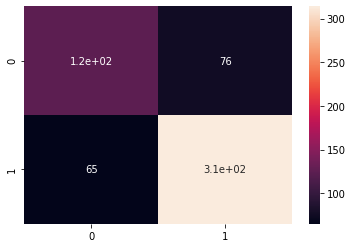

In [121]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(original, predictions)
sns.heatmap(conf_mx, annot=True)